In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (classification_report, 
                            confusion_matrix, 
                            ConfusionMatrixDisplay,
                            accuracy_score)
from sklearn.pipeline import make_pipeline

In [7]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['species'])

In [8]:
df = pd.concat([X, y], axis=1)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'species'}>, <Axes: >]], dtype=object)

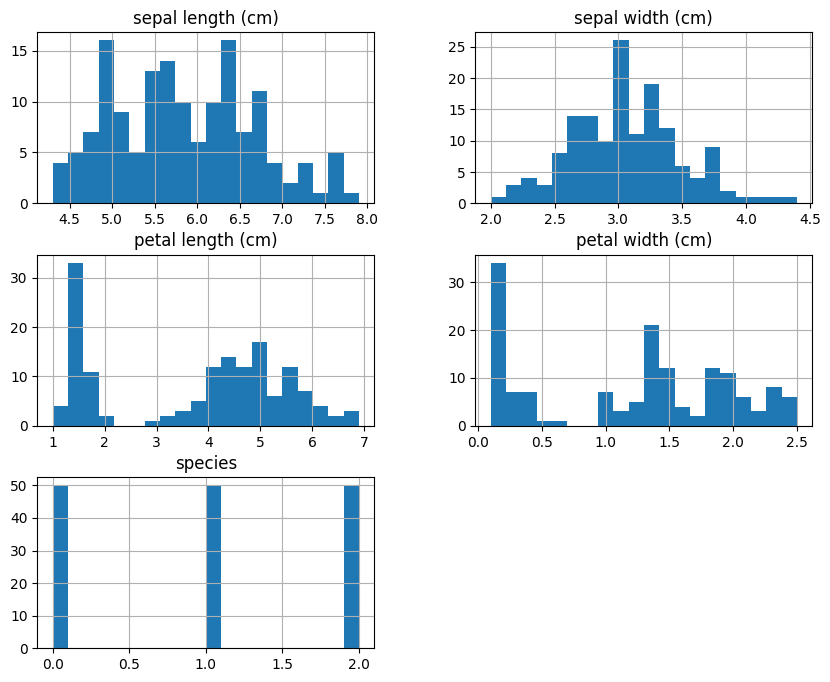

In [14]:
df.hist(figsize=(10, 8), bins=20)

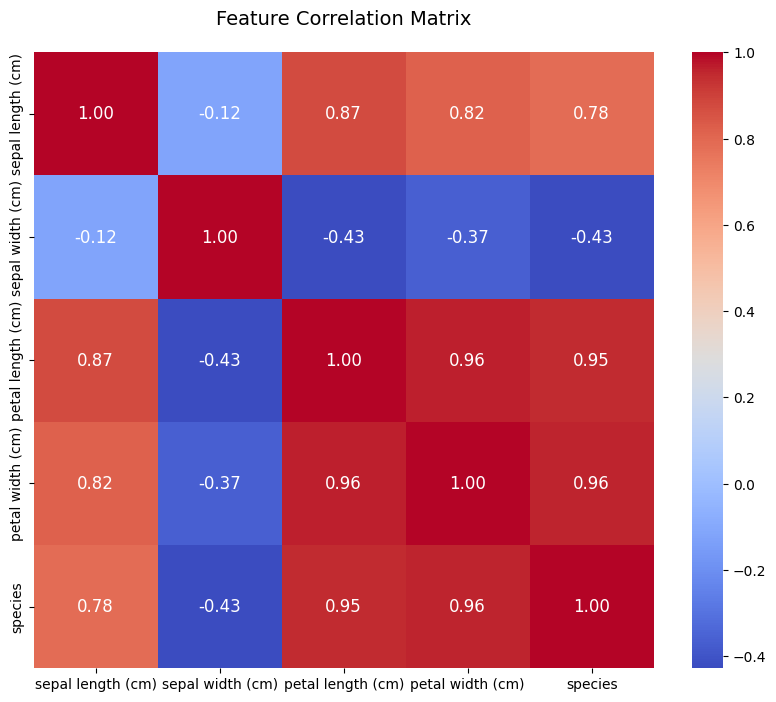

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', 
            annot_kws={'size': 12}, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=14, pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

C:\Users\sushi\AppData\Local\Temp\ipykernel_12980\2225183724.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, ax=axes[row, col], palette='Set2')
C:\Users\sushi\AppData\Local\Temp\ipykernel_12980\2225183724.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, ax=axes[row, col], palette='Set2')
C:\Users\sushi\AppData\Local\Temp\ipykernel_12980\2225183724.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, ax=axes[row, col], palette='Set2')
C:\U

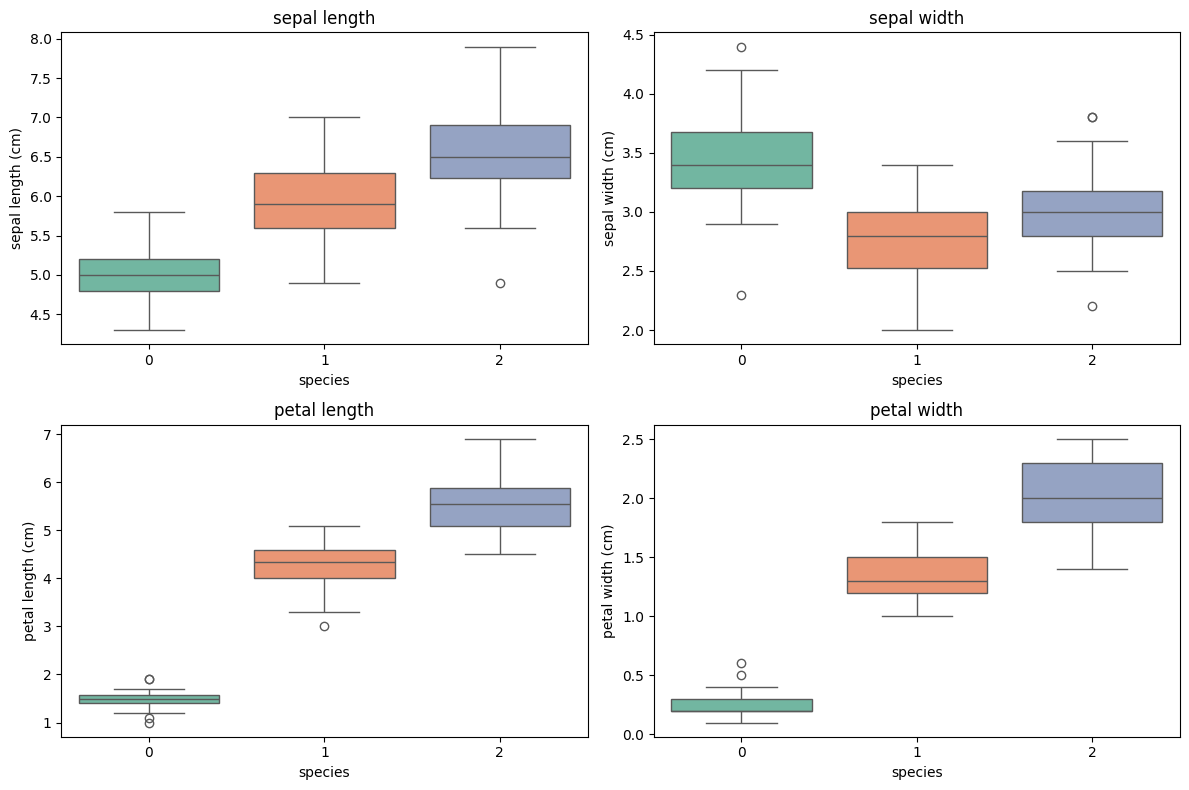

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

features = iris.feature_names

for idx, feature in enumerate(features):
    row = idx // 2
    col = idx % 2
    sns.boxplot(x='species', y=feature, data=df, ax=axes[row, col], palette='Set2')
    axes[row, col].set_title(feature.replace(' (cm)', ''))

plt.tight_layout()
plt.show()

C:\Users\sushi\AppData\Local\Temp\ipykernel_12980\3793412086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='species', data=df, palette='viridis')


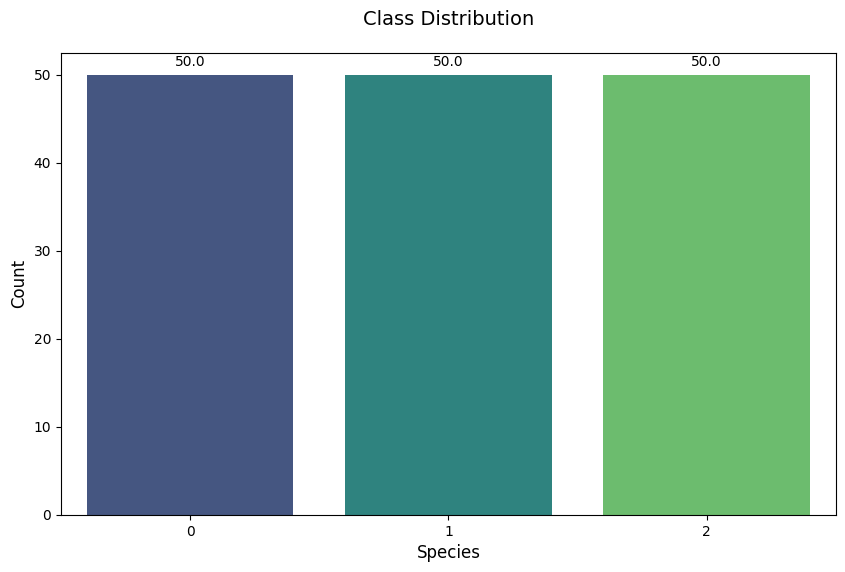

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='species', data=df, palette='viridis')
plt.title('Class Distribution', fontsize=14, pad=20)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')
plt.show()

C:\Users\sushi\AppData\Local\Temp\ipykernel_12980\793871449.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=feature, data=df,
C:\Users\sushi\AppData\Local\Temp\ipykernel_12980\793871449.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=feature, data=df,
C:\Users\sushi\AppData\Local\Temp\ipykernel_12980\793871449.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=feature, data=df,
C:\Users\sushi\AppData\Local\Temp\ipykernel_12980\793871449.py:6: FutureWarning: 

Passing `palette` wi

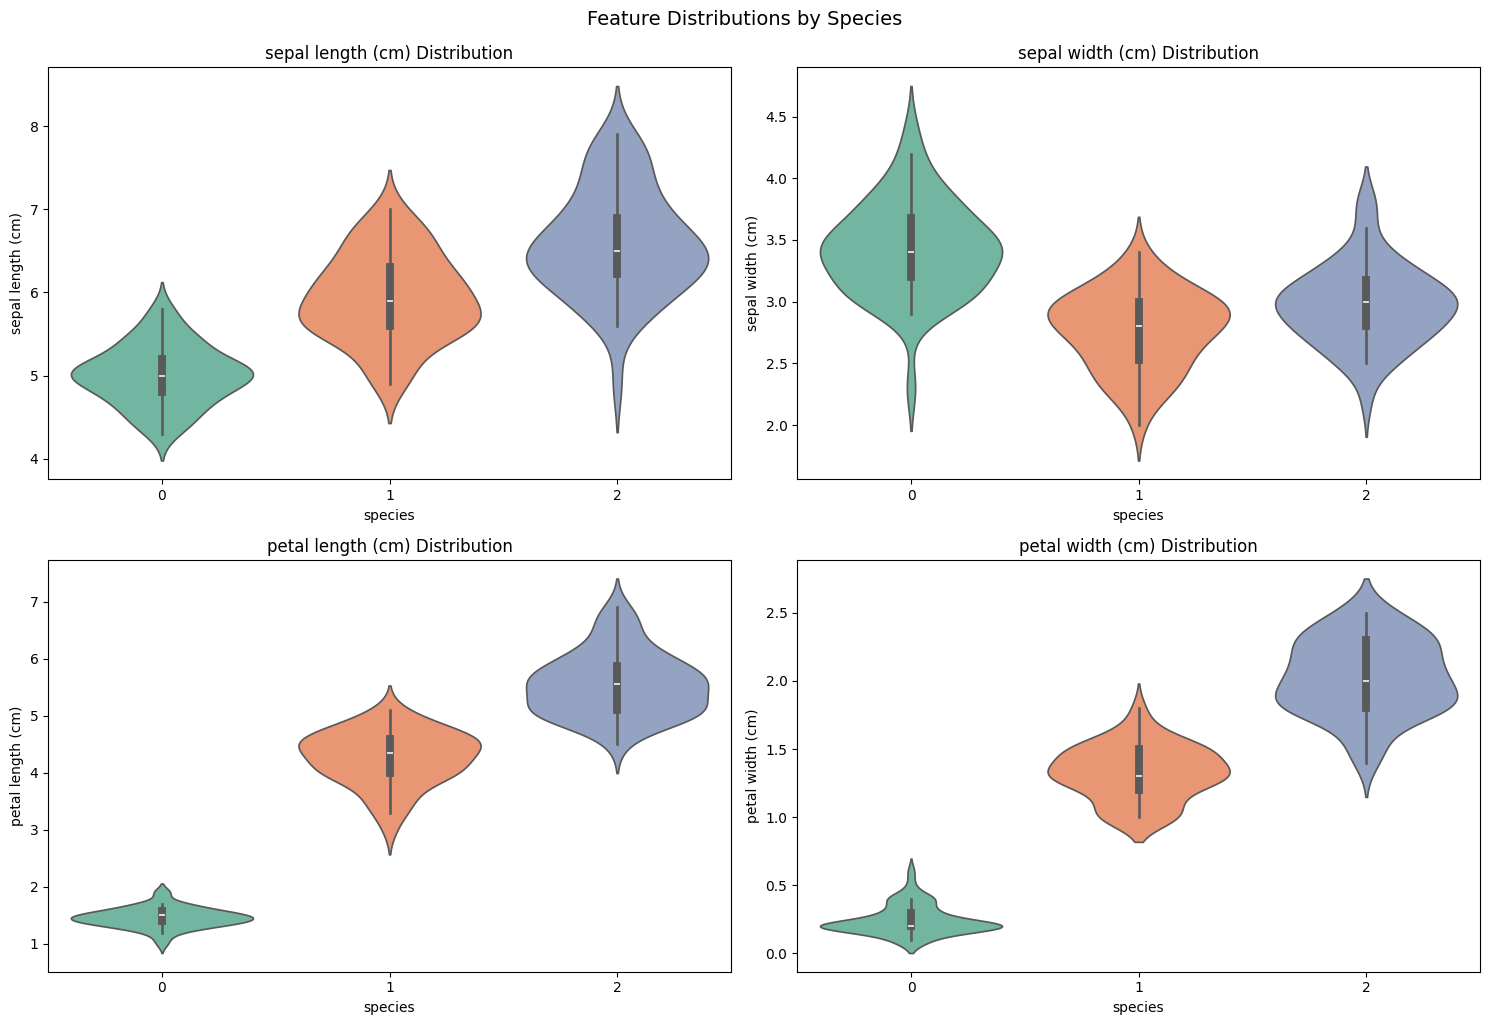

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
features = iris.feature_names
for idx, feature in enumerate(features):
    row = idx // 2
    col = idx % 2
    sns.violinplot(x='species', y=feature, data=df, 
                   ax=axes[row, col], palette='Set2')
    axes[row, col].set_title(f'{feature} Distribution', fontsize=12)
plt.tight_layout()
plt.suptitle('Feature Distributions by Species', y=1.02, fontsize=14)
plt.show()

<Figure size 1200x800 with 0 Axes>

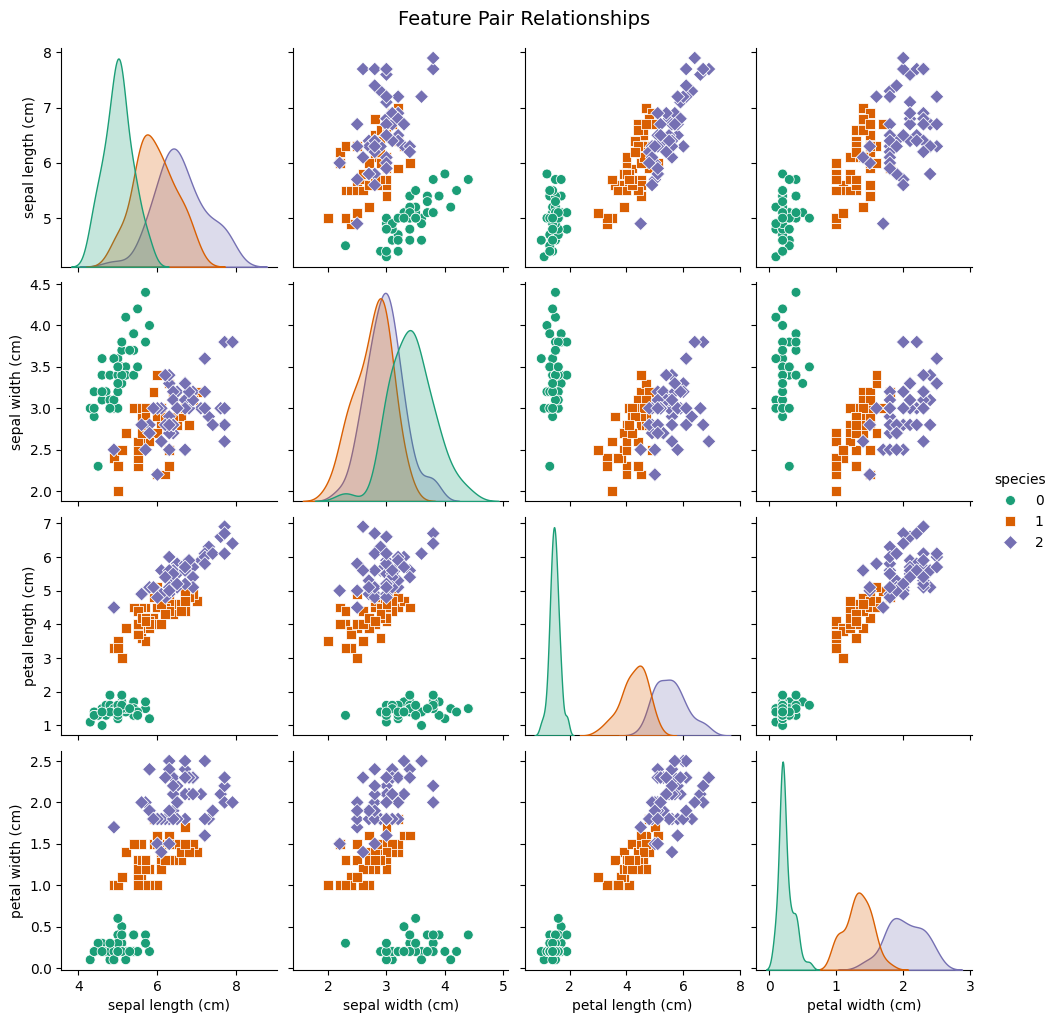

In [29]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species', palette='Dark2', 
             markers=['o', 's', 'D'], plot_kws={'s': 50})
plt.suptitle('Feature Pair Relationships', y=1.02, fontsize=14)
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

In [34]:
preprocessor = make_pipeline(
    StandardScaler()
)

In [37]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [35]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # Two hidden layers
    activation='relu',            # Rectified Linear Unit activation
    solver='adam',                # Optimization algorithm
    alpha=0.001,                  # L2 regularization parameter
    learning_rate='adaptive',     # Learning rate schedule
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2
)

In [38]:
history = mlp.fit(X_train_scaled, y_train)

c:\Users\sushi\OneDrive\Desktop\ml_prac\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


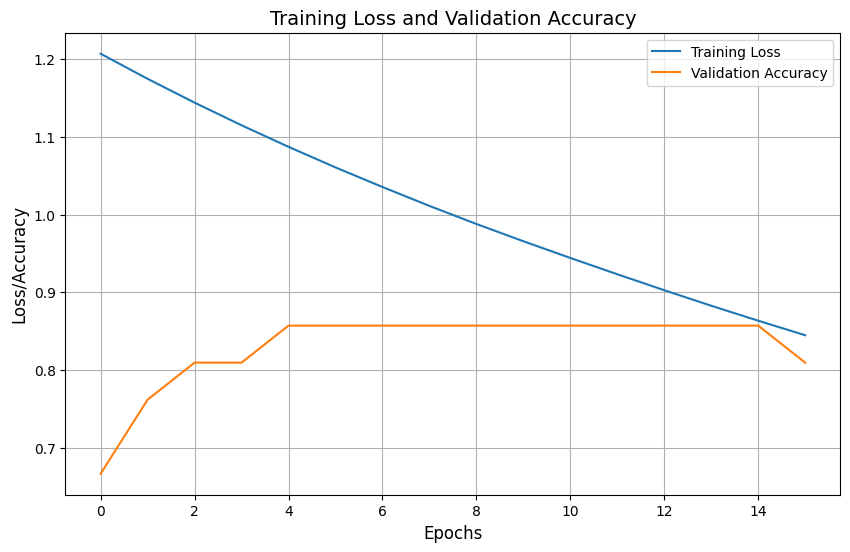

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(history.loss_curve_, label='Training Loss')
plt.plot(history.validation_scores_, label='Validation Accuracy')
plt.title('Training Loss and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss/Accuracy', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [40]:
y_pred = mlp.predict(X_test_scaled)
y_proba = mlp.predict_proba(X_test_scaled)

In [45]:
print("Classification Report:")
print(classification_report(y_test, y_pred, 
                            target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.50      1.00      0.67        15
   virginica       0.00      0.00      0.00        15

    accuracy                           0.67        45
   macro avg       0.50      0.67      0.56        45
weighted avg       0.50      0.67      0.56        45



c:\Users\sushi\OneDrive\Desktop\ml_prac\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sushi\OneDrive\Desktop\ml_prac\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sushi\OneDrive\Desktop\ml_prac\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

<Figure size 800x600 with 0 Axes>

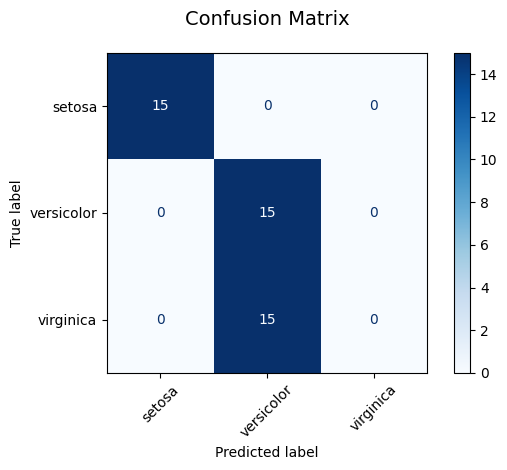

In [42]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(mlp, X_test_scaled, y_test,
                                      display_labels=iris.target_names,
                                      cmap='Blues',
                                      xticks_rotation=45)
plt.title('Confusion Matrix', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

C:\Users\sushi\AppData\Local\Temp\ipykernel_12980\3747214542.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T,


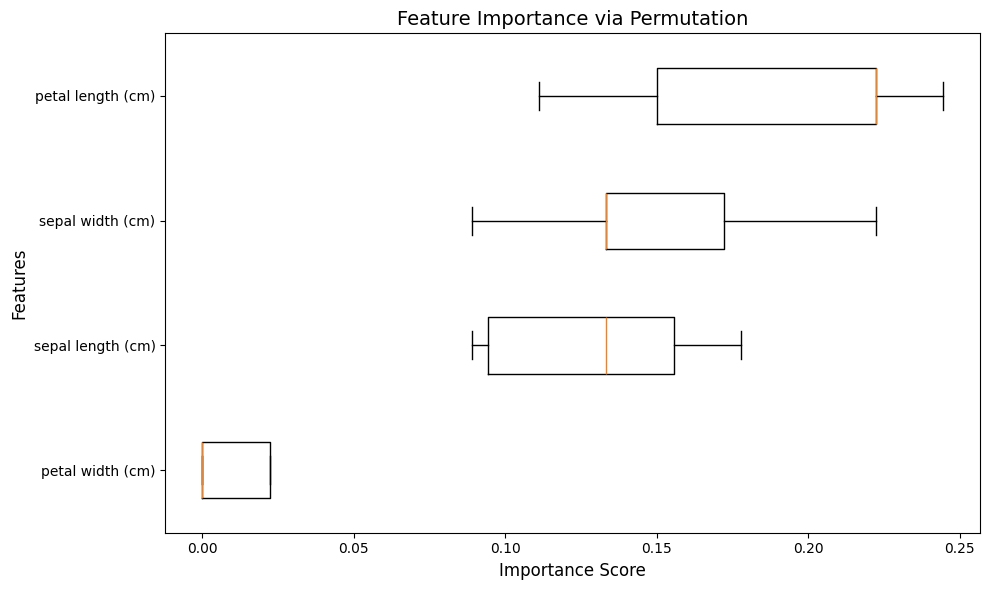

In [43]:
from sklearn.inspection import permutation_importance

result = permutation_importance(mlp, X_test_scaled, y_test,
                                n_repeats=10,
                                random_state=42)

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=X.columns[sorted_idx])
plt.title("Feature Importance via Permutation", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()